In [20]:
print("Hello world")
import keras
from tqdm import tqdm
import seaborn as sns

import datetime
import pandas_datareader.data as web
from pandas import Series, DataFrame
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Ridge,BayesianRidge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.linear_model import SGDRegressor
from copy import deepcopy
import math
import numpy as np
import sklearn as sk
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
import random
import os
from google.colab import files
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
from google.colab import drive
drive.mount('/content/drive')


Hello world
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/creditcard.csv', low_memory=False)

In [22]:
df = df.sample(frac=1).reset_index(drop=True)
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,82638.0,-1.043440,0.712755,1.072005,1.259021,0.012793,0.577655,0.272775,0.690651,-0.819780,-0.450648,0.534029,0.544219,-0.693097,0.675352,-0.378659,-0.756476,0.484581,0.075707,1.182323,0.106462,0.115001,0.169555,-0.063362,-0.308666,0.166970,-0.188331,-0.003940,0.002624,80.76,0
1,127509.0,-1.239458,0.234505,-1.059616,0.698924,2.536889,-0.603794,1.181039,-0.821756,-0.004393,1.734950,0.418350,-0.381852,-1.078819,0.458044,0.019550,-0.652016,-0.827594,0.451029,1.096317,-0.702256,-0.002410,0.982435,-0.188597,0.163388,-0.819918,-0.621306,-0.345612,-0.083618,12.09,0
2,61752.0,1.532440,-0.985542,0.129448,-1.634455,-1.048313,-0.221502,-0.992532,-0.081255,-2.127117,1.595199,0.570754,-0.186375,1.075807,-0.262960,-0.130087,0.011492,-0.071537,0.659374,0.352279,-0.255107,-0.210171,-0.220718,-0.087505,-0.505856,0.484455,-0.174233,0.028228,0.003749,15.00,0
3,167116.0,1.845787,-2.084794,-1.161231,-1.481144,-1.403059,-0.416304,-0.858223,-0.184091,-1.471229,1.630719,0.396693,-0.074840,0.671995,-0.255187,-0.836042,-0.233704,0.098319,0.509547,0.213378,0.048600,-0.022769,-0.068849,-0.002577,-0.411259,-0.282834,-0.214625,-0.030345,-0.023253,238.50,0
4,68192.0,1.485528,-1.199099,0.198268,-1.764036,-0.982927,0.530620,-1.332796,0.231796,-1.794307,1.562697,0.301713,-0.909315,-0.223595,-0.054184,0.486265,0.097178,0.077271,0.449926,0.135842,-0.348111,-0.372342,-0.772529,0.057038,-1.217994,0.153236,-0.323518,0.047348,0.003745,19.60,0


In [23]:
fraud = df.loc[df['Class'] == 1]
non_frauds = df.loc[df['Class'] == 0]
print(len(fraud))
print(len(non_frauds))

492
284315


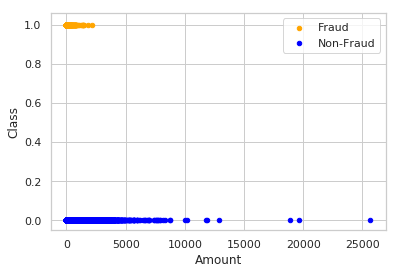

In [24]:
ax = fraud.plot.scatter(x='Amount', y='Class', color='Orange', label='Fraud')
non_frauds.plot.scatter(x='Amount', y='Class', color='Blue',label='Non-Fraud',ax=ax)
plt.show()

In [0]:
from sklearn import linear_model
from sklearn.model_selection import  train_test_split

In [26]:
x = df.iloc[:, :-1]
y = df['Class']
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.35)
print(len(X_test),len(X_train))

99683 185124


In [27]:
logistic = linear_model.LogisticRegression(C=1e5)
logistic.fit(X_train,y_train)
print('Score:', logistic.score(X_test,y_test))

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Score: 0.9988664065086323


In [0]:
scoreBall = {}


In [0]:
#solverList = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
# for test_size in range(10,90):
#   print(test_size)
#   X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=(test_size/100))
#   #for cValue in np.arange(0.0000001,0.0001,0.0000005):
#   #for solver in solverList:
#   #  if str(str(cValue)+str(test_size)+str(solver)) not in scoreBall:
#   logistic = linear_model.LogisticRegression(C=1e5,solver='lbfgs')
#   logistic.fit(X_train,y_train)
#   scoreBall[str(test_size)] = logistic.score(X_test,y_test)



In [0]:
# listofTuples = sorted(scoreBall.items() ,  key=lambda x: len (x[0] ) )
# def bubbleSort(alist):
#     for passnum in range(len(alist)-1,0,-1):
#         for i in range(passnum):
#             if alist[i][1]<alist[i+1][1]:
#                 temp = alist[i]
#                 alist[i] = alist[i+1]
#                 alist[i+1] = temp
#     return alist

# listofTuples = bubbleSort(listofTuples)
# print(listofTuples)

In [30]:
print("A range from 10-90 train_test_split values all land the estimation from 98% confidence or more.")
print("Given this, this likely means that the datapoints are very consistent.")
print("Im not sure how to optimize for this.  Maybe 50/50 or so?")

A range from 10-90 train_test_split values all land the estimation from 98% confidence or more.
Given this, this likely means that the datapoints are very consistent.
Im not sure how to optimize for this.  Maybe 50/50 or so?


In [0]:
false_neg = 0
false_pos = 0
pos_neg = 0
pos_pos = 0
y_predicted = np.array(logistic.predict(X_test))

for i,yt in enumerate(y_test):
  #print(i,yt)
  if y_predicted[i] == 0 and yt == 1:
    false_pos+=1
  elif y_predicted[i] == 0 and yt == 0:
    pos_neg+=1
  elif y_predicted[i] == 1 and yt == 1:
    pos_pos+=1
  elif y_predicted[i] == 1 and yt == 0:
    false_neg+=1
    

In [32]:
print("False Negatives:",false_neg)
print("False Positives:",false_pos)
print("Positive Negatives:",pos_neg)
print("Positive Positives",pos_pos)

False Negatives: 46
False Positives: 67
Positive Negatives: 99453
Positive Positives 117


Say you valued false positives to be twice as bad as a false negative
From here you could assign the appropriate weights and recalculate scores
Then go back and compare these with the results of other models


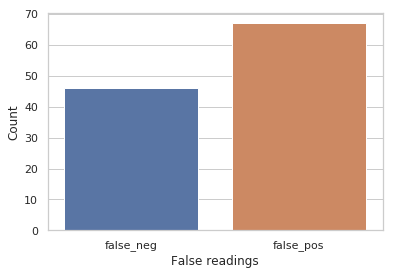

In [33]:
sns.set()
sns.set(style="whitegrid")
df_barplot = pd.DataFrame({
    'False readings': ['false_neg','false_pos'],
    'Count': [false_neg, false_pos]
})
sns.barplot(x='False readings',y='Count',data=df_barplot)

print("Say you valued false positives to be twice as bad as a false negative")
print("From here you could assign the appropriate weights and recalculate scores")
print("Then go back and compare these with the results of other models")

In [0]:

# y_predicted = np.array(logistic.predict(X_test))
# print(y_predicted)
import json
#Create your own visualization
#Try different testing sizes
#Try different models
#Custom: try different C values
filename = "eggs.json"
with open(filename,'w') as f:
  json.dump(scoreBall,f)

In [41]:
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.35)
model = keras.models.Sequential()
from keras import layers

model.add(layers.Dense(900, activation='relu', input_shape=(30,)))
model.add(layers.Dense(1800, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

from keras import optimizers

model.compile(optimizer=optimizers.RMSprop(lr=0.00001),
              loss='binary_crossentropy',metrics=['accuracy'])
from keras import losses
from keras import metrics

# #optimizer=optimizers.RMSprop(lr=0.001),
#               loss=losses.binary_crossentropy,
#               metrics=[metrics.binary_accuracy])

history = model.fit(X_train,
                    y_train,
                    epochs=2,
                    batch_size=64,
                    validation_data=(X_test, y_test))

Train on 185124 samples, validate on 99683 samples
Epoch 1/2
185124/185124 [==============================] - 63s 341us/step - loss: 0.0405 - acc: 0.9975 - val_loss: 0.0249 - val_acc: 0.9985
Epoch 2/2
185124/185124 [==============================] - 63s 341us/step - loss: 0.0294 - acc: 0.9982 - val_loss: 0.0249 - val_acc: 0.9985


False Negatives: 0
False Positives: 154
Positive Negatives: 99519
Positive Positives 0
99683/99683 [==============================] - 8s 80us/step
Score: 0.9984551026754813


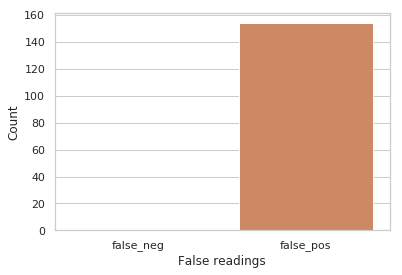

In [42]:
false_neg = 0
false_pos = 0
pos_neg = 0
pos_pos = 0
y_predicted = np.array(model.predict(X_test))

for i,yt in enumerate(y_test):
  #print(i,yt)
  if y_predicted[i] == 0 and yt == 1:
    false_pos+=1
  elif y_predicted[i] == 0 and yt == 0:
    pos_neg+=1
  elif y_predicted[i] == 1 and yt == 1:
    pos_pos+=1
  elif y_predicted[i] == 1 and yt == 0:
    false_neg+=1
print("False Negatives:",false_neg)
print("False Positives:",false_pos)
print("Positive Negatives:",pos_neg)
print("Positive Positives",pos_pos)
sns.set()
sns.set(style="whitegrid")
df_barplot = pd.DataFrame({
    'False readings': ['false_neg','false_pos'],
    'Count': [false_neg, false_pos]
})
sns.barplot(x='False readings',y='Count',data=df_barplot)
print('Score:',model.evaluate(X_test,y_test)[1])

In [44]:
print("There are no false negatives, but there are overall more false readings.")
print("In our hypothetical above where we value false positives twice as weighted as false negatives this model performs much much worse")
print("However, in another hypothetical where false positives are weighted lower, this model could be much more competitive.")

There are no false negatives, but there are overall more false readings.
In our hypothetical above where we value false positives twice as weighted as false negatives this model performs much much worse
However, in another hypothetical where false positives are half as weighted, this model is much more competitive.
